In [84]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

if 'notebooks' in os.getcwd():
    os.chdir("..")
api_key = "demo"

In [17]:
from transformers import BertTokenizer, BertForSequenceClassification

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

In [2]:
def get_customized_news(stock, start_date, end_date, n_news, api_key, offset = 0):
    url = f'https://eodhistoricaldata.com/api/news?api_token={api_key}&s={stock}&limit={n_news}&offset={offset}&from={start_date}&to={end_date}'
    news_json = requests.get(url).json()
    
    news = []
    news_complete = []
    
    for i in range(len(news_json)):
        title = news_json[-i]['title']
        complete = news_json[-i]
        news.append(title)
        news_complete.append(complete)
    
    return news, news_complete

In [94]:
apple_news, apple_complete = get_customized_news('AAPL', '2019-12-30', '2021-12-30', 1_000, api_key, 0)

In [95]:
apple_complete.sort(key= lambda x : x["date"])

In [96]:
len(apple_complete)

1000

In [97]:
apple_complete

[{'date': '2021-11-17T19:59:48+00:00',
  'title': 'ICO Probes Companies Including Apple, Google',
  'content': 'The Information Commissioner\'s Office contacted 40 companies in the areas of social media, gaming, video, music streaming, including Apple Inc (NASDAQ: AAPL) and Alphabet Inc (NASDAQ: GOOG) (NASDAQ: GOOGL) Google, Financial Times reports. The U.K. data protection regulator aims to investigate their interactions with children, including location tracking, personalizing content or advertising, and serving up behavioral nudges, like automatically playing videos endangering children online and breaching U.K.\'s Children Code. "We are focusing our interventions on . . . online services where there is information which indicates potential poor compliance with privacy requirements, and where there is a high risk of potential harm to children," information commissioner Elizabeth Denham said. Denham said she has contacted them to "enquire about the extent to which the risks associate

In [67]:
apple_news

["Don't Wait for a Market Crash: These 2 Top Stocks Are on Sale",
 'Apple Prepares to Source Chips From Arizona',
 'Ken Fisher Stock Portfolio: Top 10 Stock Picks',
 'Apple plans to source chips from Arizona plant that’s set to open in 2024: report',
 'IPhone Pro Output Estimates Cut by Morgan Stanley After Lockdown',
 'Stocks Edge Higher, Target, Nvidia, Apple And Estee Lauder - Five Things To Know',
 'Meta Loses Yet Another Key India Official To Rival',
 'Chinese authorities call on retired soldiers to help Foxconn iPhone plant -SSN',
 'Airbnb Is on the Outs — Or Is It?',
 'Micron Starts Monetizing Cutting-Edge Chip Production In Japan',
 'Did Warren Buffett Make the Taiwan Semi Call? It’s Not Clear.',
 'The Best Charging Stations of 2022',
 "Warren Buffett's new 13F is out — and he's leaning on these 3 big holdings to fight white-hot inflation",
 'Apple Plans to Buy American-Made Chips. They Probably Won’t Be Made by an American Chip Maker.',
 '3 Top Stocks to Buy for the Long Haul'

In [68]:
news_with_apple = []

for new in apple_complete:
    if 'Apple' in new['title'] or 'apple' in new['title']:
        news_with_apple.append(new)

len(news_with_apple)

453

In [69]:
labels = {0:'neutral', 1:'positive',2:'negative'}

sent_val = list()
for new in news_with_apple:
    inputs = tokenizer(new['title'], return_tensors="pt", padding=True)
    outputs = finbert(**inputs)[0]
   
    val = labels[np.argmax(outputs.detach().numpy())]
    print(new['title'], '----', val)
    print('#######################################################')    
    sent_val.append(val)

Apple Prepares to Source Chips From Arizona ---- neutral
#######################################################
Apple plans to source chips from Arizona plant that’s set to open in 2024: report ---- neutral
#######################################################
Stocks Edge Higher, Target, Nvidia, Apple And Estee Lauder - Five Things To Know ---- positive
#######################################################
Apple Plans to Buy American-Made Chips. They Probably Won’t Be Made by an American Chip Maker. ---- neutral
#######################################################
Apple to buy U.S.-made chips from TSMC in supply chain pivot ---- neutral
#######################################################
Some Apple iPhones Won’t Be Delivered Before Christmas ---- neutral
#######################################################
Apple to buy chips from Arizona semiconductor plant, report says ---- neutral
#######################################################
3 Reasons to Buy Apple Stock in 2

In [70]:
sent_val[125]

'negative'

In [71]:
news_with_apple[125]

{'date': '2022-11-29T03:08:11+00:00',
 'title': "Reactions to Apple supplier Foxconn's labour unrest",
 'content': '(Reuters) - Thousands of employees at Foxconn\'s flagship iPhone plant in China have quit since last week, as the major Apple supplier battles the latest bout of labour unrest that began in late October due to strict zero-COVID policy.\n\nFollowing are reactions from experts:\n\nPIA GISGARD, HEAD OF SUSTAINABILITY AND GOVERNANCE AT SWEDBANK ROBUR\n\n"The events taking place at Foxconn’s production facility are worrying and highly undesirable from workplace health, safety and general wellbeing, and harmony perspectives."\n\n"We see that in these times of unrest, Apple needs to intensify its dialogue with Foxconn management, and if possible Chinese authorities, to communicate in strong terms what its policy expectations are around labour rights, and find solutions to stabilise the situation."\n\n"Foxconn is bound to follow Chinese government orders regarding COVID lockdowns

## Distribution of news on time

In [72]:
apple_df = pd.DataFrame(news_with_apple)[["date", "title", "content"]]
apple_df

date  \
0    2022-11-15T23:08:47+00:00   
1    2022-11-16T00:33:00+00:00   
2    2022-11-16T10:16:00+00:00   
3    2022-11-16T14:32:00+00:00   
4    2022-11-16T15:33:11+00:00   
..                         ...   
448  2022-12-30T14:00:02+00:00   
449  2022-12-30T15:55:00+00:00   
450  2022-12-30T16:25:17+00:00   
451  2022-12-30T17:31:04+00:00   
452  2022-12-30T17:58:05+00:00   

                                                 title  \
0          Apple Prepares to Source Chips From Arizona   
1    Apple plans to source chips from Arizona plant...   
2    Stocks Edge Higher, Target, Nvidia, Apple And ...   
3    Apple Plans to Buy American-Made Chips. They P...   
4    Apple to buy U.S.-made chips from TSMC in supp...   
..                                                 ...   
448  Apple Inc. (AAPL) Is a Trending Stock: Facts t...   
449  'Double' Trouble for Apple Could Actually Help...   
450  Apple stock a top pick for 2023, Citi analyst ...   
451  Apple CEO Cook conveyed app store curb concern...   
452  Earnings Outlook for 2023 and Featured Reports...   

                                               content  
0    Apple Inc. CEO Tim Cook says the company is pr...  
1    Apple Inc. plans to source chips for its devic...  
2    Stock futures gain as concern over Poland rock...  
3    Taiwan Semiconductor is building a $12 billion...  
4    Yahoo Finance’s Daniel Howley joins the Live s...  
..                                                 ...  
448  Apple (AAPL) has recently been on Zacks.com's ...  
449  Apple has formed a massive double-top pattern....  
450  Yahoo Finance's Brian Sozzi discusses an analy...  
451  (Reuters) - Apple Inc Chief Executive Tim Cook...  
452  Friday, December 30, 2022\n\nThe Zacks Researc...  

[453 rows x 3 columns]

In [73]:
apple_df['sentiment'] = sent_val

In [74]:
apple_df

date  \
0    2022-11-15T23:08:47+00:00   
1    2022-11-16T00:33:00+00:00   
2    2022-11-16T10:16:00+00:00   
3    2022-11-16T14:32:00+00:00   
4    2022-11-16T15:33:11+00:00   
..                         ...   
448  2022-12-30T14:00:02+00:00   
449  2022-12-30T15:55:00+00:00   
450  2022-12-30T16:25:17+00:00   
451  2022-12-30T17:31:04+00:00   
452  2022-12-30T17:58:05+00:00   

                                                 title  \
0          Apple Prepares to Source Chips From Arizona   
1    Apple plans to source chips from Arizona plant...   
2    Stocks Edge Higher, Target, Nvidia, Apple And ...   
3    Apple Plans to Buy American-Made Chips. They P...   
4    Apple to buy U.S.-made chips from TSMC in supp...   
..                                                 ...   
448  Apple Inc. (AAPL) Is a Trending Stock: Facts t...   
449  'Double' Trouble for Apple Could Actually Help...   
450  Apple stock a top pick for 2023, Citi analyst ...   
451  Apple CEO Cook conveyed app store curb concern...   
452  Earnings Outlook for 2023 and Featured Reports...   

                                               content sentiment  
0    Apple Inc. CEO Tim Cook says the company is pr...   neutral  
1    Apple Inc. plans to source chips for its devic...   neutral  
2    Stock futures gain as concern over Poland rock...  positive  
3    Taiwan Semiconductor is building a $12 billion...   neutral  
4    Yahoo Finance’s Daniel Howley joins the Live s...   neutral  
..                                                 ...       ...  
448  Apple (AAPL) has recently been on Zacks.com's ...   neutral  
449  Apple has formed a massive double-top pattern....  negative  
450  Yahoo Finance's Brian Sozzi discusses an analy...  positive  
451  (Reuters) - Apple Inc Chief Executive Tim Cook...  negative  
452  Friday, December 30, 2022\n\nThe Zacks Researc...   neutral  

[453 rows x 4 columns]

In [75]:
apple_df["date"] = pd.to_datetime(apple_df["date"])

In [76]:
apple_df["date"]= apple_df["date"].dt.tz_localize(None)


In [77]:
from datetime import datetime
apple_df[apple_df['date'] > datetime(2020, 1, 1)]

date                                              title  \
0   2022-11-15 23:08:47        Apple Prepares to Source Chips From Arizona   
1   2022-11-16 00:33:00  Apple plans to source chips from Arizona plant...   
2   2022-11-16 10:16:00  Stocks Edge Higher, Target, Nvidia, Apple And ...   
3   2022-11-16 14:32:00  Apple Plans to Buy American-Made Chips. They P...   
4   2022-11-16 15:33:11  Apple to buy U.S.-made chips from TSMC in supp...   
..                  ...                                                ...   
448 2022-12-30 14:00:02  Apple Inc. (AAPL) Is a Trending Stock: Facts t...   
449 2022-12-30 15:55:00  'Double' Trouble for Apple Could Actually Help...   
450 2022-12-30 16:25:17  Apple stock a top pick for 2023, Citi analyst ...   
451 2022-12-30 17:31:04  Apple CEO Cook conveyed app store curb concern...   
452 2022-12-30 17:58:05  Earnings Outlook for 2023 and Featured Reports...   

                                               content sentiment  
0    Apple Inc. CEO Tim Cook says the company is pr...   neutral  
1    Apple Inc. plans to source chips for its devic...   neutral  
2    Stock futures gain as concern over Poland rock...  positive  
3    Taiwan Semiconductor is building a $12 billion...   neutral  
4    Yahoo Finance’s Daniel Howley joins the Live s...   neutral  
..                                                 ...       ...  
448  Apple (AAPL) has recently been on Zacks.com's ...   neutral  
449  Apple has formed a massive double-top pattern....  negative  
450  Yahoo Finance's Brian Sozzi discusses an analy...  positive  
451  (Reuters) - Apple Inc Chief Executive Tim Cook...  negative  
452  Friday, December 30, 2022\n\nThe Zacks Researc...   neutral  

[453 rows x 4 columns]

In [78]:
apple_df['sentiment'].value_counts()

neutral     237
negative    145
positive     71
Name: sentiment, dtype: int64

In [81]:
apple_df.query("sentiment=='positive'")

date                                              title  \
2   2022-11-16 10:16:00  Stocks Edge Higher, Target, Nvidia, Apple And ...   
11  2022-11-17 15:15:00  4 Charts That Show Why Apple Could Outperform ...   
22  2022-11-20 23:06:37  Dow Jones Futures Rise: Market Rally Faces Big...   
23  2022-11-21 01:52:37  Dow Jones Futures Fall: Is Uptrend More Than B...   
35  2022-11-22 10:54:56  UPDATE 2-UK investigating Apple, Google mobile...   
..                  ...                                                ...   
440 2022-12-29 14:00:00                    Better Buy: Microsoft vs. Apple   
441 2022-12-29 15:10:31  Apple: 'We like the stock here at these levels...   
445 2022-12-29 18:40:44  Citi analyst on Apple: 'We like the stock here...   
446 2022-12-29 19:17:00  Apple shares look to snap four-day losing stre...   
450 2022-12-30 16:25:17  Apple stock a top pick for 2023, Citi analyst ...   

                                               content sentiment  
2    Stock futures gain as concern over Poland rock...  positive  
11   In 2020, billionaire investor Warren Buffett s...  positive  
22   The market rally faces key resistance, namely ...  positive  
23   The market rally faces key resistance, namely ...  positive  
35   *\n\nProbe follows consultation\n\n*\n\nTo exa...  positive  
..                                                 ...       ...  
440  It hasn't been easy to be a stock investor in ...  positive  
441  Citi Managing Director in Equity Research Jim ...  positive  
445  After a 12% rout in December, Apple's stock va...  positive  
446  Shares of Apple Inc. rallied on Thursday — but...  positive  
450  Yahoo Finance's Brian Sozzi discusses an analy...  positive  

[71 rows x 4 columns]

In [82]:
apple_df.query("sentiment=='negative'")

date                                              title  \
7   2022-11-16 20:00:00  3 Reasons to Buy Apple Stock in 2023 -- And Ne...   
10  2022-11-17 13:48:41  Apple stock drops, set to snap 4-day streak of...   
14  2022-11-18 15:02:13  Apple stock bucks Big Tech downdraft for the year   
16  2022-11-18 18:54:00  The Stock Market Refuses to Break. Apple Is a ...   
17  2022-11-18 21:20:39  Apple iPhone Production Snags Could Push $3 Bi...   
..                  ...                                                ...   
430 2022-12-28 19:43:18  Apple stock faces major test that could turn ‘...   
432 2022-12-28 21:24:00  As Heavyweights Like Apple and Amazon Sag, Tra...   
442 2022-12-29 15:33:00  All 30 Dow stocks rise, led by Disney and Appl...   
449 2022-12-30 15:55:00  'Double' Trouble for Apple Could Actually Help...   
451 2022-12-30 17:31:04  Apple CEO Cook conveyed app store curb concern...   

                                               content sentiment  
7    Apple didn't reach this size by luck, either -...  negative  
10   Shares of Apple Inc. dropped 1.9% in premarket...  negative  
14   Yahoo Finance's Brian Sozzi breaks down the st...  negative  
16   The tech behemoth's stock is signaling things ...  negative  
17   Apple's iPhone 14 supply continues to be const...  negative  
..                                                 ...       ...  
430  After a nearly 14% drubbing in December, Apple...  negative  
432  The Nasdaq and Nasdaq 100/Invesco fund hit new...  negative  
442  The Dow Jones Industrial Average’s (DJIA) 307-...  negative  
449  Apple has formed a massive double-top pattern....  negative  
451  (Reuters) - Apple Inc Chief Executive Tim Cook...  negative  

[145 rows x 4 columns]

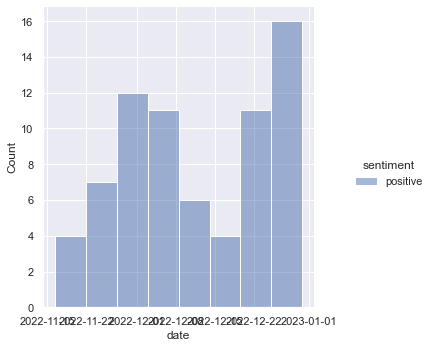

In [79]:
sns.displot(apple_df.query("sentiment=='positive'"), x = "date", hue="sentiment")

In [83]:
apple_df.to_pickle("data/apple_news_sentiment.pkl")

In [43]:
sent_val

['positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',


In [52]:
len(apple_news)

351

In [37]:
stock = 'AAPL'
n_news = 100
offset = 0
start_date = '2016-12-30'
end_date = '2021-12-30'

In [38]:
url = f'https://eodhistoricaldata.com/api/news?api_token={api_key}&s={stock}&limit={n_news}&offset={offset}&from={start_date}&to={end_date}'
news_json = requests.get(url).json()

news = []

for i in range(len(news_json)):
    title = news_json[-i]['title']
    news.append(title)

In [39]:
news_json

[{'date': '2021-12-30T23:00:00+00:00',
  'title': "The Unsung Winners and Biggest Losers of China's Rocky Markets in 2021",
  'content': '(Bloomberg) -- In a year that’s seen China’s “common prosperity” agenda roil global equity markets, the nation’s policies also created a greater divide between stock winners and losers at home.\n\nMost Read from Bloomberg\n\nGhislaine Maxwell Found Guilty in Win for Epstein Victims Mercedes Swept Up in China Internet Furor Over Models’ Eyes CDC Tells Even Vaccinated to Avoid Cruises; Shares Tumble T Cells Come to the Rescue as Studies Show They Buck Omicron Apple Aims to Prevent Defections to Meta With Rare $180,000 Bonuses for Top Talent\n\nPolicy direction looks set to drive market sentiment in 2022 as well, with a twice-a-decade party congress that could extend President Xi Jinping’s term. Jolted by Beijing’s regulatory onslaught, education names such as Gaotu Techedu Inc. and property developers like China Evergrande Group are at the bottom of th

In [40]:
news

["The Unsung Winners and Biggest Losers of China's Rocky Markets in 2021",
 'Huawei, Honor and Motorola Push New Foldable Phones in China',
 'Meta Gains as KeyBanc Sees Holidays Boosting Oculus Headset Sales',
 'Apple Stock Tests $3 Trillion Mark; New York Stores Closed Amid Covid Surge',
 'Santa Baby, Volatility, CDC Shift, Apple $3T, CES, Trading Energy Stock APA',
 'GuidePath Tactical Allocation Fund Buys Laboratory Corp of America Holdings, Alphabet Inc, The ...',
 'Apple Stock Shrugs off Store Closures in Bid for $3 Trillion Tag',
 'Pre-Market Movers: Tesla Pops, Lucid Group Dips, Nvidia and AMD Rise',
 'Stock Futures Push Higher After S&amp;P 500 Sets Another Record',
 'The 1 FAANG Stock to Buy Hand Over Fist for the Second Half of 2021 (and Beyond)',
 'A Top Growth Stock to Buy for 2022',
 'If I Could Invest in Only 1 Metaverse Stock, This Would Be It',
 "Apple's stock set to open in record territory, as it looks to extend win streak",
 'Apple Stock Just Got Safer, and With a Be

In [41]:
len(news)

100

In [22]:
tsla_news = get_customized_news('TSLA', '2011-11-09', '2021-11-11', 20, api_key, 0)

In [23]:
tsla_news

['Apple’s App Store Could Get Ad Revenue Boost From Privacy Push',
 'Making Sense of the Evolving Earnings Picture',
 'Epic Games chief to speak in S.Korea as Google, Apple face app store challenge',
 'Dow Jones Futures: Market Rally Skids Despite Solid Rivian Debut, Tesla Bounce; Affirm Spikes Late, Disney Falls',
 'Influencers with Andy Serwer: Alex Rodriguez',
 'The Sentiment Around Roku Stock Has Turned Sour',
 'Why Is Everyone Talking About The Trade Desk Stock?',
 'Dow Jones Futures Point To Market Rally; Musk Sells $5 Billion In Tesla Stock, Rivian Rises Again, Affirm Spikes',
 'Is It Too Late to Buy The Trade Desk Stock?',
 '2 Top Tech Stocks to Buy on the Dip for Long-Term Growth',
 'Applied Intuition Raises\xa0$175 Million for Automotive Software Tools',
 'Luminar Tech, Tutor Perini, Lenovo, HP and Apple highlighted as Zacks Bull and Bear of the Day',
 'Amazon (AMZN) Expands Latin America Presence Via New Launch',
 "Apple CEO Tim Cook Is a Crypto Investor but the Company Won'